In [156]:
#imports
import numpy as np
import astropy 
from astropy.io import ascii
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import SkyCoord
%matplotlib inline

In [160]:
#matches one catalog to another, finding the nearest neighbors. 
#runs through the nearest neighbors finding the neighbors within the given radius
#returns a list of indices from the second catalog of the objects that are within the radius
#of objects within the first catalog, and a list of indices of the distances between 'matches'
#in arcseconds.
#Parameters: 
#coords1: SkyCoord array for smaller catalog
#coords2: SkyCoord array for larger catalog
#radius: float for the matching radius **in arcseconds**
#selfmatch: boolean indicating if the matching between a catalog and itself

def matchCatalog(coords1, coords2, radius, selfmatch):
    if selfmatch:
        #if self matching the returned index array will have the pairs of matches
        #the dist array with have the same distance for each index in the pair
        indx, dist2d, dist3d = coords1.match_to_catalog_sky(coords2, 2)
        if indx.size==1:
            if dist2d <=radius*u.arcsecond:
                matches = indx
                dist = dist2d.arcsecond
        else:
            matches = []
            dist = []
            indexMatches = (dist2d <= radius*u.arcsecond).nonzero()
            matches = indx[indexMatches]
            dist = dist2d[indexMatches].arcsecond
    
    
    else:
        indx, dist2d, dist3d = coords1.match_to_catalog_sky(coords2, 1)
        if indx.size==1:
            if dist2d <=radius*u.arcsecond:
                matches = indx
                dist = dist2d.arcsecond
        else:
            matches = []
            dist = []
            indexMatches = (dist2d <= radius*u.arcsecond).nonzero()
            matches = indx[indexMatches]
            dist = dist2d[indexMatches].arcsecond
            
    return matches, dist

In [161]:
onecoord = SkyCoord(taurus['ra'][2], taurus['dec'][2], unit = 'deg')
matches, dist = matchCatalog(onecoord, tauruscoords, 1.0, False)
print matches
print len(dist)

2
1


In [162]:
esplin = ascii.read('../../KoenigSelectedCatalogs/Taurus/EsplinFewColumns.txt')
taurus = ascii.read('../../KoenigSelectedCatalogs/Taurus/finalTaurusSelection_withWISE_APOGEELimits.txt')
megeath = ascii.read('../../OrionCatalogs/orionCatalogMegeath.tsv')

esplincoords = SkyCoord(esplin['ra'], esplin['dec'], unit = 'deg')
tauruscoords = SkyCoord(taurus['ra'], taurus['dec'], unit = 'deg')
megeathcoords = SkyCoord(megeath['_RAJ2000'][2:], megeath['_DEJ2000'][2:], unit = 'deg')

matches, dist = matchCatalog(megeathcoords, megeathcoords, 3.0, True)
print matches
print min(dist)



[ 202  201  247  245  792  791 1286 1285 1378 1377 1499 1498 1603 1598 1968
 1965 2339 2337 2419 2418 2767 2766 2957 2956 3086 3085]
1.3063131989


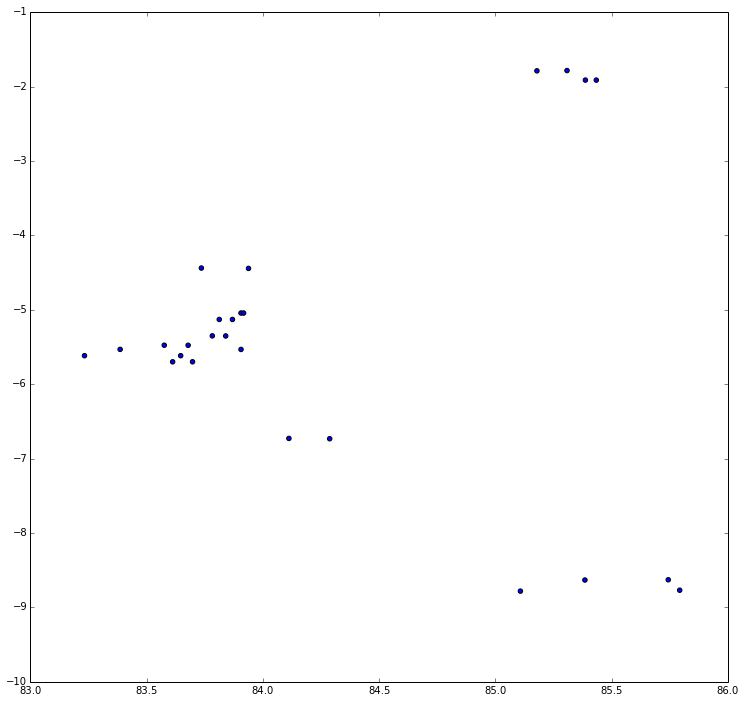

In [150]:
plt.scatter(megeath['_RAJ2000'][matches], megeath['_DEJ2000'][matches])
fig = plt.gcf()
fig.set_size_inches(12.5, 12)

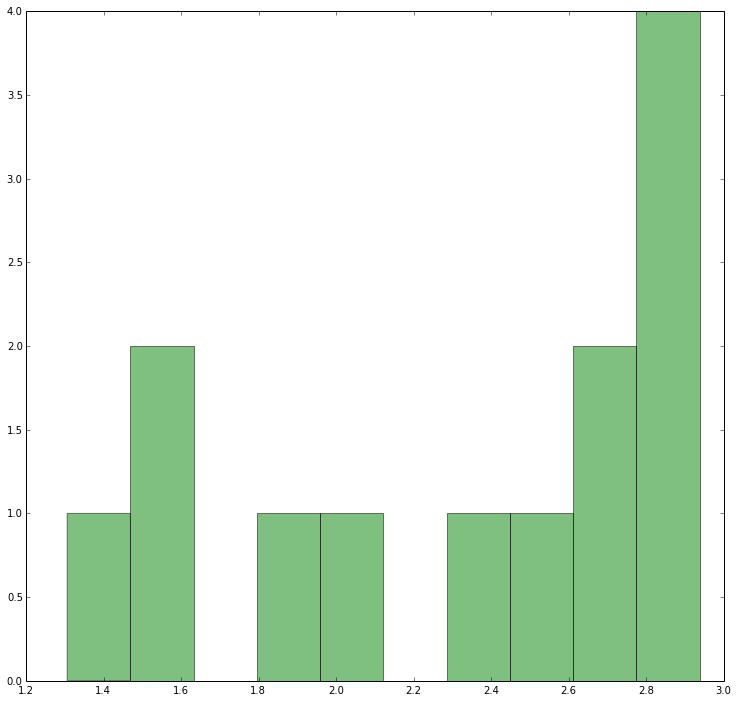

In [153]:
distNew = []
for i in range(len(dist)):
    if i%2==0:
        distNew.append(dist[i])
        
plt.hist(distNew, alpha = 0.5, color = 'green')
fig = plt.gcf()
fig.set_size_inches(12.5, 12)